In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import pickle

import warnings
warnings.filterwarnings('ignore')


## Read Dataset

In [4]:
df = pd.read_csv('dataset/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Check size, duplicated rows & Null Values

In [5]:
df.shape

(1303, 12)

In [6]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool>

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Removing the Units & Changing the Data types
Removing the `GB` and `KG` from Ram and Weight respectively

In [9]:
# removing the units
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

# changing the data type
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


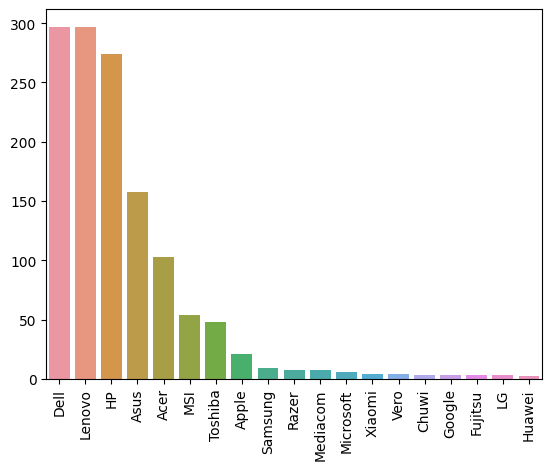

In [11]:
# df['Company'].value_counts().plot(kind='bar')

x = (df['Company'].value_counts())
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation='vertical')
plt.show()

### Avg price across different company

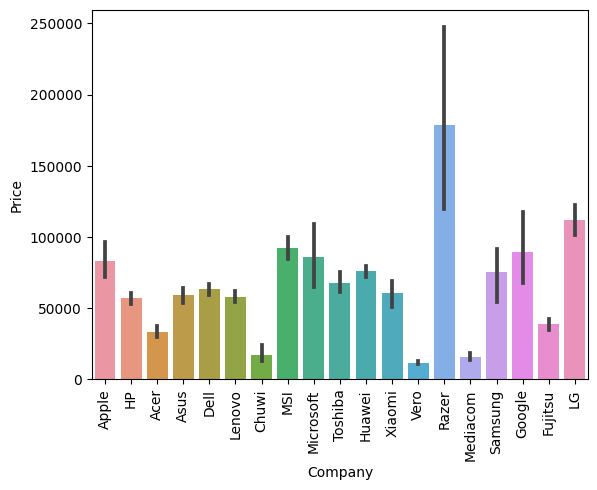

In [12]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

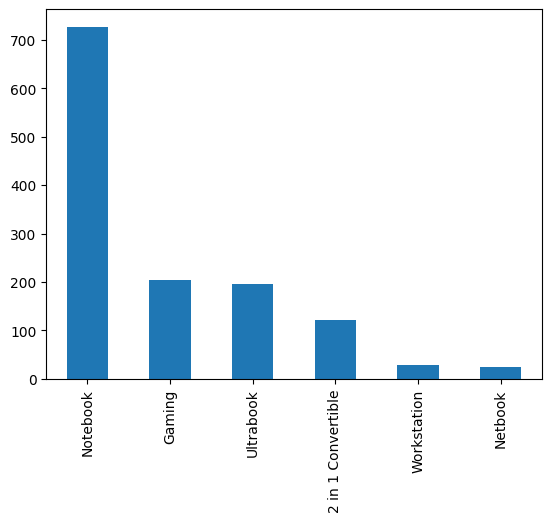

In [13]:
df['TypeName'].value_counts().plot(kind='bar')

### Avg price across different laptop type

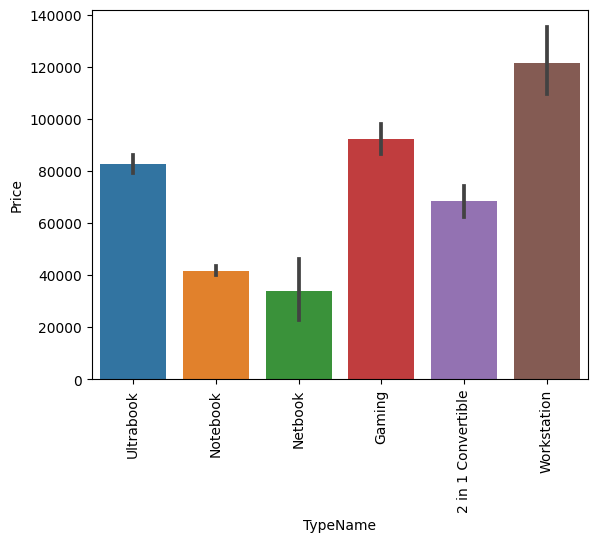

In [14]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Screen Size Distribution

<AxesSubplot: xlabel='Inches', ylabel='Density'>

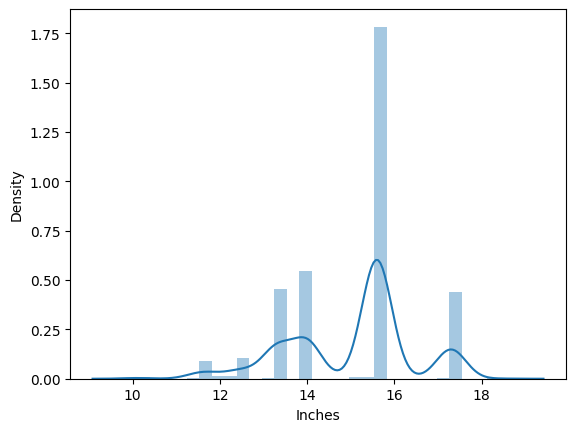

In [15]:
sns.distplot(df['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

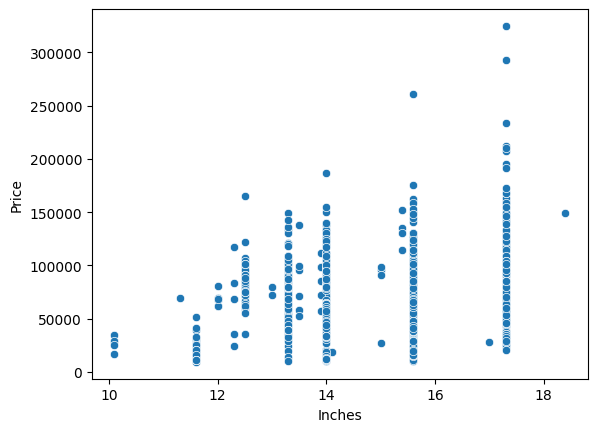

In [16]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

## Screen Type
Extracting the type of screen from `ScreenResolution` column

In [17]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'touchscreen' in x.lower() else 0 )
df['IpsPanel'] = df['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0 )
df['4k'] = df['ScreenResolution'].apply(lambda x: 1 if '4k' in x.lower() else 0 )
df['FullHd'] = df['ScreenResolution'].apply(lambda x: 1 if 'full hd' in x.lower() else 0 )
df['UltraHd'] = df['ScreenResolution'].apply(lambda x: 1 if 'ultra hd' in x.lower() else 0 )
df['RetinaDisplay'] = df['ScreenResolution'].apply(lambda x: 1 if 'retina display' in x.lower() else 0 )
df['QuadHD+'] = df['ScreenResolution'].apply(lambda x: 1 if 'quad hd+' in x.lower() else 0 )
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1,0,0,1,0,0,0
629,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,96969.6000,0,0,0,1,0,0,0
155,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6,256GB SSD,AMD Radeon 520,Windows 10,1.91,32980.3200,0,0,0,1,0,0,0
429,Mediacom,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.16,15930.7200,1,1,0,1,0,0,0
671,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,1.90,43580.3760,0,0,0,1,0,0,0


<AxesSubplot: >

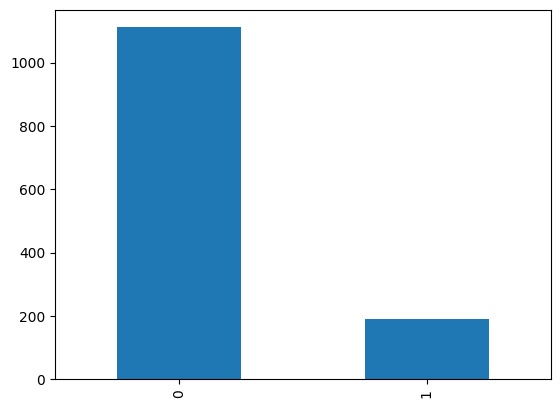

In [18]:
df.TouchScreen.value_counts().plot(kind='bar')

### Avg price for Touch Screen

<AxesSubplot: xlabel='TouchScreen', ylabel='Price'>

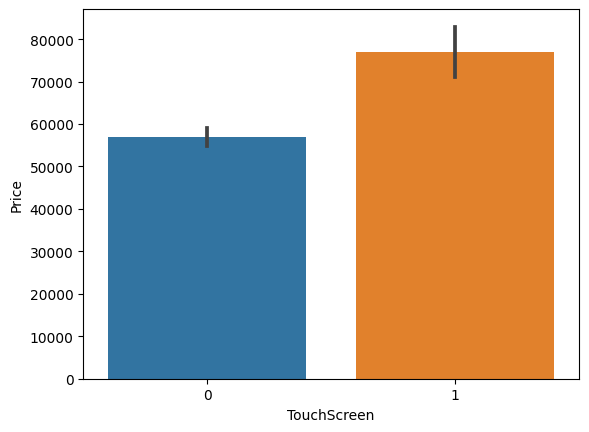

In [19]:
sns.barplot(x=df['TouchScreen'], y=df['Price'])

### Avg price for IPS Panel

<AxesSubplot: xlabel='IpsPanel', ylabel='Price'>

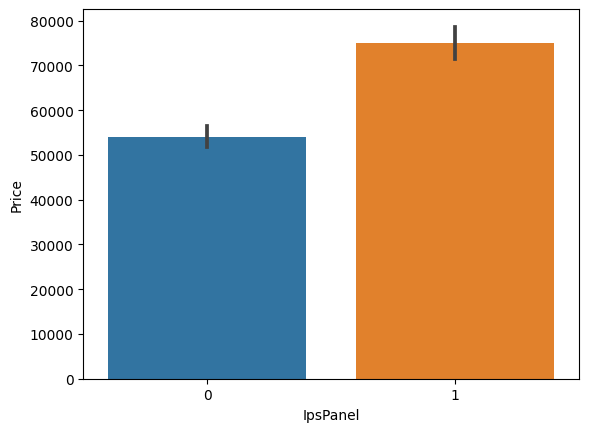

In [20]:
sns.barplot(x=df['IpsPanel'], y=df['Price'])

## Screen Resolution

In [21]:
new_df = df['ScreenResolution'].str.split('x', n=1, expand=True)
new_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [22]:
df['x_res'] = new_df[0].apply(lambda x: x.split()[-1])
df['y_res'] = new_df[1]

df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,0,0,1440,900


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IpsPanel          1303 non-null   int64  
 13  4k                1303 non-null   int64  
 14  FullHd            1303 non-null   int64  
 15  UltraHd           1303 non-null   int64  
 16  RetinaDisplay     1303 non-null   int64  


### Checking the Correlation with `Price`

In [24]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IpsPanel         0.252208
4k               0.343982
FullHd           0.198612
UltraHd          0.343982
RetinaDisplay    0.087895
QuadHD+          0.106643
x_res            0.556529
y_res            0.552809
Name: Price, dtype: float64

### Deriving PPI (Pixel Per Inch)

$diagonal \; in \; pixels = \sqrt{width^2+height^2}$
<br/><br/>
$ppi = \dfrac{diagonal \; in \; pixels}{diagonal \; in \; inches}$

In [25]:
# pixel per inch
df['ppi'] = (((df['x_res'] ** 2) + (df['y_res'] ** 2))**0.5/df['Inches']).astype('float')
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,x_res,y_res,ppi
60,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,...,0,0,0,1,0,0,0,1920,1080,127.335675
428,HP,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.35,...,0,0,0,1,0,0,0,1920,1080,127.335675


In [26]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IpsPanel         0.252208
4k               0.343982
FullHd           0.198612
UltraHd          0.343982
RetinaDisplay    0.087895
QuadHD+          0.106643
x_res            0.556529
y_res            0.552809
ppi              0.473487
Name: Price, dtype: float64

### Dropping unnecessary columns
`X_res` and `Y_res` can be dropped as `PPI` is derived from this

In [27]:
df.drop(columns=['Inches', 'ScreenResolution', 'x_res', 'y_res'], inplace=True)
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,ppi
508,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.34,70489.44,0,1,0,1,0,0,0,165.632118
193,Lenovo,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,2.80,37189.44,0,0,0,0,0,0,0,106.113062


## CPU Brand
To get the CPU Brand (column: `cpu`)
- For `Intel`, extract the first `3 word`
- For `others`, extract the first `2 words`

In [28]:
cpu_list = []
for i in df['Cpu']:
    if "Intel" in i:
        temp = i.split()[:3]
        if "-" in temp[-1]:
            temp[-1] = temp[-1].split("-")[0]
        cpu_list.append(" ".join(temp).lower())
    else:
        cpu_list.append(" ".join(i.split()[:2]).lower())

# exception is handled
cpu_list = ["intel atom x5" if i == 'intel atom z8350' else i for i in cpu_list]

# new colummn is created and assigned
df['CpuBrand'] = cpu_list
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,ppi,CpuBrand
178,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD R17M-M1-70,Windows 10,1.90,43316.64,0,0,0,1,0,0,0,141.211998,intel core i5
615,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231.04,0,0,0,1,0,0,0,127.335675,intel core i7
807,HP,Notebook,AMD A12-Series 9700P 2.5GHz,8,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.12,0,0,0,0,0,0,0,100.454670,amd a12-series
1018,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.47,79387.20,0,1,0,1,0,0,0,157.350512,intel core i5
696,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.38,93186.72,1,0,0,1,0,0,0,157.350512,intel core i7


## Processor Speed

In [29]:
df['processorSpeed'] = df['Cpu'].str.split('GHz', n=1, expand=True)[0].apply(lambda x: x.split()[-1]).astype(float)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,ppi,CpuBrand,processorSpeed
298,Lenovo,Notebook,AMD A10-Series 9600P 2.4GHz,6,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,26586.72,0,0,0,1,0,0,0,141.211998,amd a10-series,2.4
208,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.72,0,0,0,1,0,0,0,165.632118,intel core i7,1.8
367,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.40,43103.52,0,1,0,1,0,0,0,141.211998,intel core i5,2.5
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.60,0,1,0,1,0,0,0,157.350512,intel core i5,1.6
456,Dell,Notebook,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.88,0,1,0,1,0,0,0,127.335675,intel core i7,2.7


<AxesSubplot: >

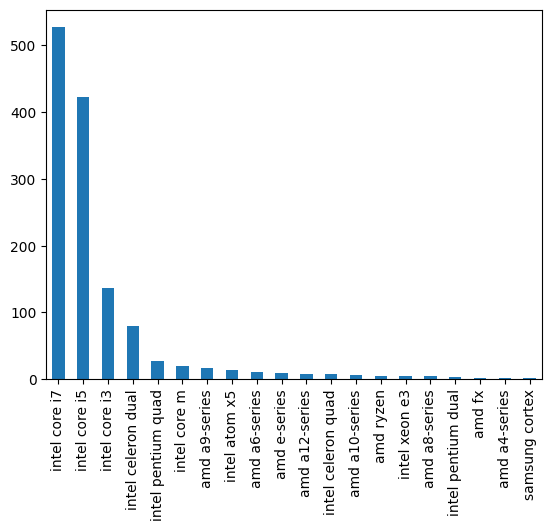

In [30]:
df['CpuBrand'].value_counts().plot(kind='bar')

### Avg price for each type of processor

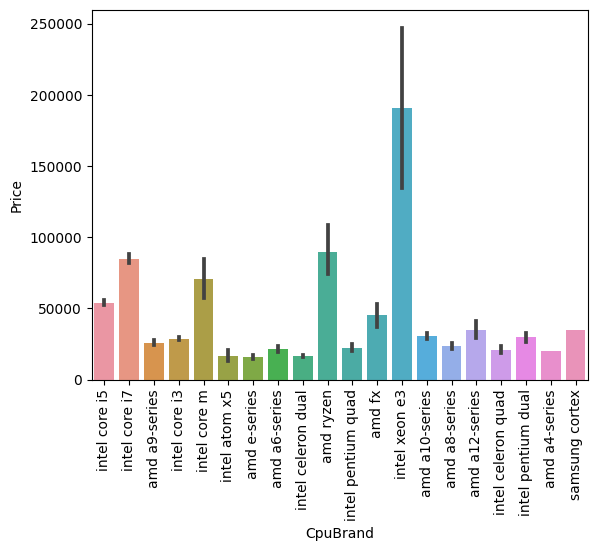

In [31]:
sns.barplot(x=df['CpuBrand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

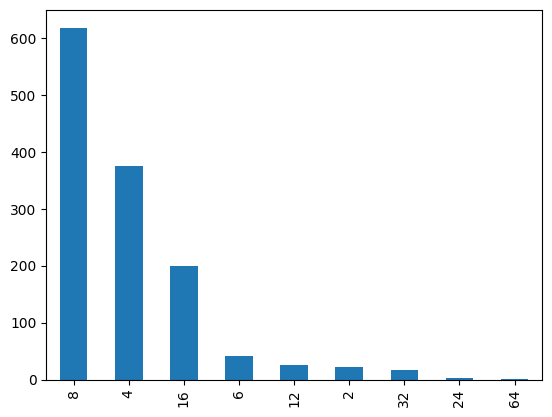

In [32]:
df['Ram'].value_counts().plot(kind='bar')

### Avg price for each type of RAM

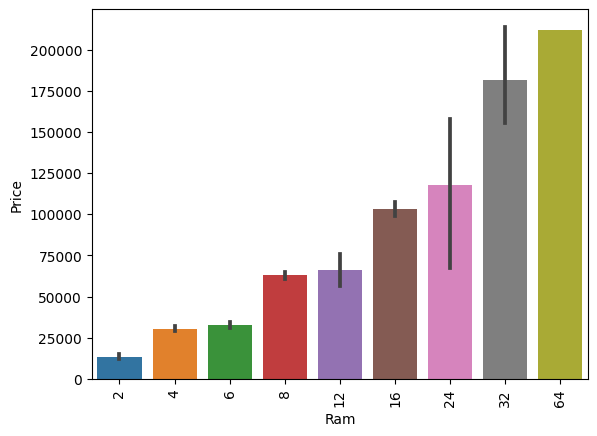

In [33]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Memory Type & Capacity
- Extracting `HDD`, `SSD` , `Hybrid` & `Flash` from column `Memory`
- Converting TB to GB

In [34]:
def filter_memory_capacity(data, filter):
    capacity = 0
    li = data.split()
    for idx, itm in enumerate(li):
        if itm == filter:
            try:
                capacity = float(li[idx-1][:-2])
                if li[idx-1][-2:] == 'TB':
                    capacity *= 1024    
            except:
                capacity = 0
                print(filter, "--->", li[idx-1][:-3], "----->", li)
    return capacity

df['SSD'] = df['Memory'].apply(lambda x: filter_memory_capacity(x, 'SSD'))
df['HDD'] = df['Memory'].apply(lambda x: filter_memory_capacity(x, 'HDD'))
df['Hybrid'] = df['Memory'].apply(lambda x: filter_memory_capacity(x, 'Hybrid'))
df['Flash'] = df['Memory'].apply(lambda x: filter_memory_capacity(x, 'Flash'))

## GPU
Extracting the first 2 word of the GPU will provide the type of GPU

In [35]:
df['Gpu'] = df['Gpu'].apply(lambda x: " ".join(x.split()[:2]).lower() if len(x)!= 0 else 'no gpu')
df['Gpu'].value_counts()

intel hd          639
nvidia geforce    368
amd radeon        173
intel uhd          68
nvidia quadro      31
intel iris         14
amd firepro         5
amd r4              1
nvidia gtx          1
amd r17m-m1-70      1
intel graphics      1
arm mali            1
Name: Gpu, dtype: int64

In [36]:
# amd r17m-m1-70 & amd r4 both belongs to the Raedon category
# replacing the value of these two
df['Gpu'] = df['Gpu'].apply(lambda x: "amd radeon" if x in ["amd r17m-m1-70", "amd r4"] else x)
df['Gpu'].value_counts()

intel hd          639
nvidia geforce    368
amd radeon        175
intel uhd          68
nvidia quadro      31
intel iris         14
amd firepro         5
nvidia gtx          1
intel graphics      1
arm mali            1
Name: Gpu, dtype: int64

### Checking correlation of the Price with others

In [37]:
df.corr()['Price']*100

Ram                74.300714
Weight             21.036980
Price             100.000000
TouchScreen        19.122646
IpsPanel           25.220762
4k                 34.398218
FullHd             19.861160
UltraHd            34.398218
RetinaDisplay       8.789528
QuadHD+            10.664341
ppi                47.348731
processorSpeed     43.029310
SSD                67.602583
HDD                -9.408166
Hybrid              0.801080
Flash              -4.051115
Name: Price, dtype: float64

### Avg price for each type of GPU

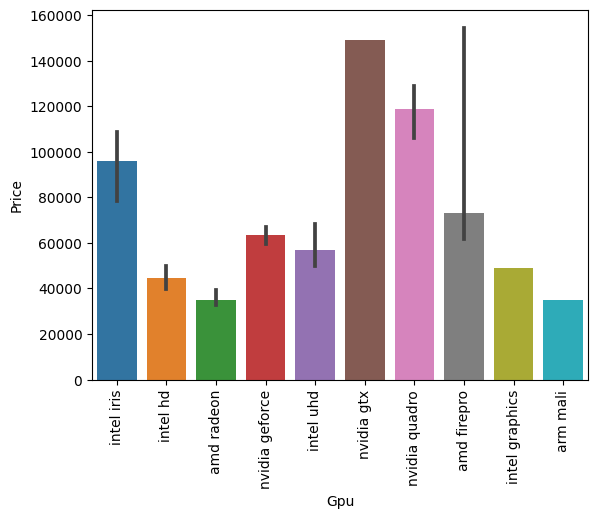

In [38]:
sns.barplot(x=df['Gpu'], y=df['Price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

## OS
- Keeping 3 types of OS - Windowws, Mac & Others

In [39]:
def filter_os(data):
    data = data.lower()
    if "mac" in data:
        return 'mac'
    elif 'win' in data:
        return 'windows'
    else:
        return 'other os'
df['os'] = df['OpSys'].apply(filter_os)
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,RetinaDisplay,QuadHD+,ppi,CpuBrand,processorSpeed,SSD,HDD,Hybrid,Flash,os
158,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,256GB SSD,intel uhd,Windows 10,1.56,55890.72,1,...,0,0,141.211998,intel core i7,1.8,256.0,0.0,0.0,0.0,windows
990,HP,Netbook,Intel Core M 6Y75 1.2GHz,8,512GB SSD,intel hd,Windows 10,0.97,101658.24,0,...,0,0,176.232574,intel core m,1.2,512.0,0.0,0.0,0.0,windows


### Avg price against each type of OS

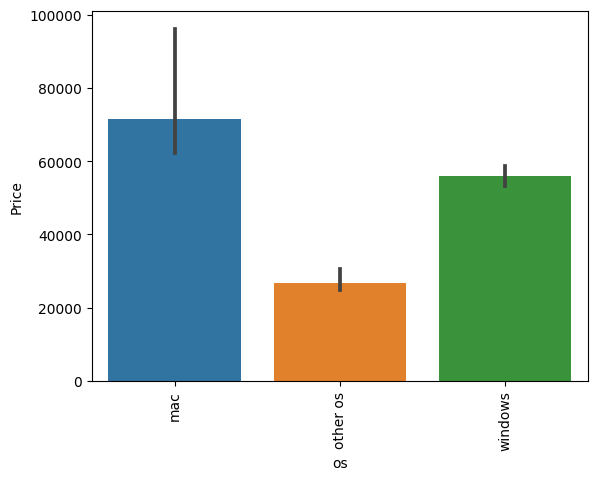

In [40]:
sns.barplot(x=df['os'], y=df['Price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

## Price and Weight Distribution

<AxesSubplot: xlabel='Weight', ylabel='Price'>

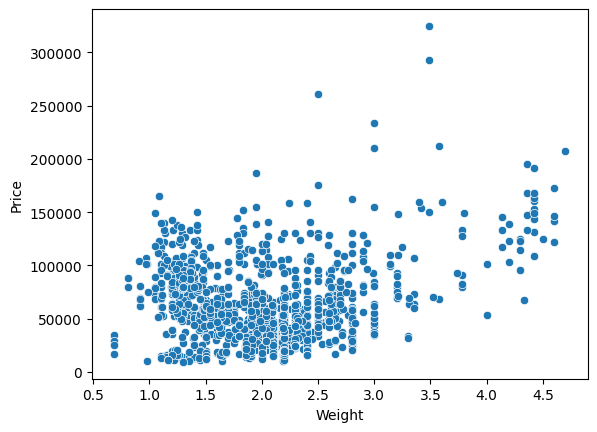

In [41]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

## Dropping unnecessary columns

In [42]:
df.drop(columns=['Cpu','Memory', 'Hybrid','Flash', 'OpSys'], inplace=True)
df.sample(3)

,Company,TypeName,Ram,Gpu,Weight,Price,TouchScreen,IpsPanel,4k,FullHd,UltraHd,RetinaDisplay,QuadHD+,ppi,CpuBrand,processorSpeed,SSD,HDD,os
601,HP,Notebook,4,intel hd,2.10,35616.6144,0,0,0,0,0,0,0,100.454670,intel core i3,2.40,0.0,500.0,windows
1130,HP,Notebook,8,intel hd,2.04,33513.1200,0,0,0,0,0,0,0,100.454670,intel core i7,2.70,0.0,2048.0,windows
30,Chuwi,Notebook,4,intel hd,1.89,13053.0672,0,0,0,1,0,0,0,141.211998,intel atom x5,1.44,0.0,0.0,windows


## Heatmap of the Dataset

<AxesSubplot: >

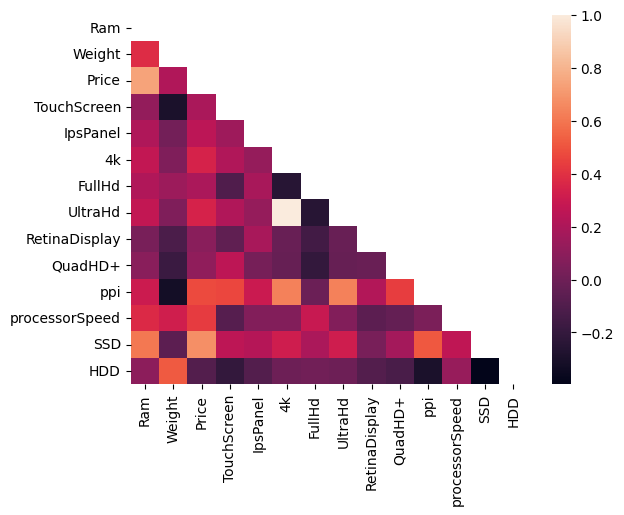

In [43]:
sns.heatmap(df.corr(), mask=np.triu(df.corr()))

## Log Transformation of the `Price` Column

<AxesSubplot: xlabel='Price', ylabel='Density'>

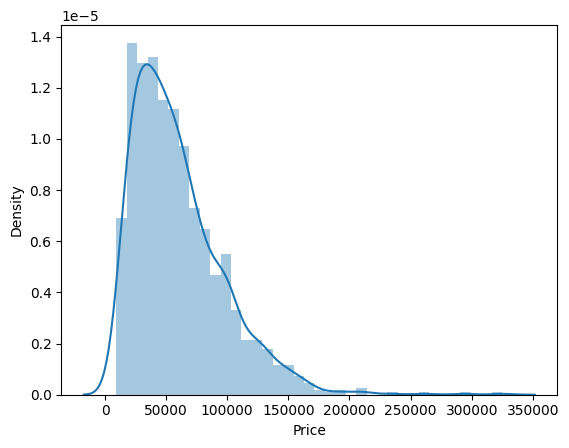

In [44]:
sns.distplot(df['Price'])

<AxesSubplot: xlabel='Price', ylabel='Density'>

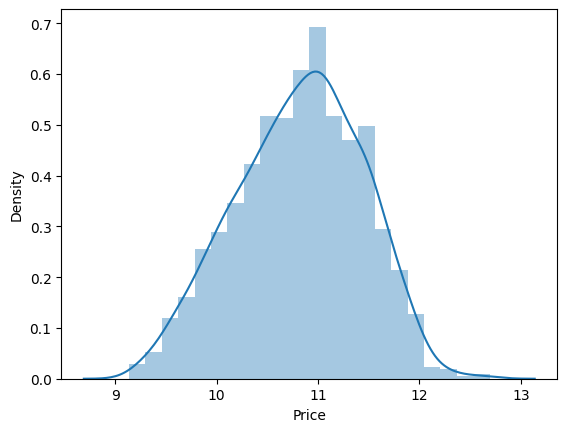

In [45]:
sns.distplot(np.log(df['Price']))

## Train-Test Split

In [46]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2)

## Model Building

In [48]:
step1 = ColumnTransformer(transformers=[
            ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 13, 17])
            ],
            remainder='passthrough')

In [49]:
df_model_score = pd.DataFrame(columns=['model', 'r2_score', 'mae'])

def add_data_df(df, algo, y_test, y_pred):
    df.loc[len(df.index)] = [algo,
                             round(r2_score(y_test, y_pred),2),
                             round(mean_absolute_error(y_test, y_pred),2)]
    return df

### Linear Regression

In [50]:
step2 = LinearRegression()
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'LinearRegression', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18


### Ridge Regression

In [51]:
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'Ridge', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19


### Lasso Regression

In [52]:
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'Lasso', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19


### KNN

In [53]:
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'KNN', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19


### Decision Tree

In [54]:
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'DecisionTree', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18


### SVM

In [55]:
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'SVM', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17


### Random Forest

In [56]:
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'RF', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15


### Extra Trees

In [57]:
step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15,
                            bootstrap=True)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'ExtraTrees', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16


### AdaBoost

In [58]:
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'AdaBoost', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16
8,AdaBoost,0.80,0.23


### Gradient Boost

In [59]:
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'GradientBoost', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16
8,AdaBoost,0.80,0.23
9,GradientBoost,0.91,0.14


### XGBoost

In [60]:
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'XGBoost', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16
8,AdaBoost,0.80,0.23
9,GradientBoost,0.91,0.14


### Voting Regressor

In [61]:
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10, bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'VotingRegressor', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16
8,AdaBoost,0.80,0.23
9,GradientBoost,0.91,0.14


### Stacking

In [62]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
df_model_score = add_data_df(df_model_score, 'Stacking', y_test, y_pred)
df_model_score

,model,r2_score,mae
0,LinearRegression,0.86,0.18
1,Ridge,0.85,0.19
2,Lasso,0.86,0.19
3,KNN,0.83,0.19
4,DecisionTree,0.84,0.18
5,SVM,0.88,0.17
6,RF,0.90,0.15
7,ExtraTrees,0.89,0.16
8,AdaBoost,0.80,0.23
9,GradientBoost,0.91,0.14


<h3><b>XGBoost</b> Provides the best result</h3>

## Exporting the Model

In [63]:
# selecting the XGBoost Model
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 13, 17])])),
                ('step2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=45,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [64]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('model.pkl', 'wb'))

In [65]:
# model = pickle.load(open("model.pkl", 'rb'))
# company='Apple'
# type='Ultrabook'
# ram=8
# gpu='intel iris'
# weight=1.0
# touchscreen=1
# ips=0
# _4k=0
# fullHd=0
# ultraHd=0
# retinaDis=0
# quadHd=0
# ppi=218.10962080022756
# cpu='intel core i5'
# processor_speed=0.9
# ssd=0
# hdd=512
# os='mac'

# query = np.array(
#         [
#             company,
#             type,
#             ram,
#             gpu,
#             weight,
#             touchscreen,
#             ips,
#             _4k,
#             fullHd,
#             ultraHd,
#             retinaDis,
#             quadHd,
#             ppi,
#             cpu,
#             float(processor_speed),
#             ssd,
#             hdd,
#             os,
#         ]
#     )
# query = query.reshape(1, 18).astype(object)
# len(query)    
# predicted_price = int(np.exp(model.predict(query)[0]))
# model.predict(query)
